In [1]:
library(tidyverse)
library(ggplot2)
library(ggridges)

── Attaching core tidyverse packages ─────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
p <- ggplot(geneset_sz, aes(x = lib_name, y = num_genes, fill = lib_name)) +
  geom_boxplot(outlier.shape = NA, alpha = 0.5) +  # Add a boxplot, outlier.shape = NA hides the outliers
  geom_jitter(width = 0.2, alpha = 0.1, aes(color = lib_name)) +  # Add jittered points to show individual data points
  stat_summary(fun = median, geom = "text", aes(label = round(..y.., 1)), vjust = -0.5, color = "black", size = 4) +  # Add median values
  scale_y_log10() +  # Use a logarithmic scale for the y-axis
  xlab("Library Name") +
  ylab("Number of Genes in Gene Set (log10 scale)") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    legend.position = "none",
    strip.text = element_text(face = "bold", size = 12),
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
p

ERROR: Error in eval(expr, envir, enclos): object 'geneset_sz' not found


In [ ]:
ggsave("figures/3_boxplot_number_of_genes_per_lib.pdf", plot = p, device = "pdf", width = 8, height = 8, dpi = 300)

In [ ]:
df <- readr::read_tsv("genes_overlap.tsv")

In [ ]:
head(df)

In [ ]:
# Compute the percentage of "descr" that has "p_val_adj" < 0.01 for each "database" and "model"
percentage_df <- df %>%
  filter(gene_set == "llm_genes_role") %>%
  group_by(database, model) %>%
  summarise(percentage = sum(p_val_adj < 0.01) / n() * 100)

In [ ]:
# Create the bar plot
p <- ggplot(percentage_df, aes(x = database, y = percentage, fill = model)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  scale_y_continuous(breaks = seq(0, 100, by = 10), limits = c(0, 100))+
  labs(
       x = "Database",
       y = "Percentage",
      fill = "Model") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
p

In [ ]:
ggsave("figures/4_percent_sig_compare_models.pdf", plot = p, device = "pdf", width = 10, height = 8, dpi = 300)

In [ ]:
# Read the data
df <- read.csv('genes_overlap.tsv', sep='\t')

# Define p-value thresholds
p_value_thres <- c(0.001, 0.01, 0.1, 0.5)
df_res <- data.frame()

# Loop through each threshold
for (thres in p_value_thres) {
    
    df_thres <- df %>%
        filter(p_val < thres) %>%
        group_by(database, model) %>%
        summarise(gene_set = n()) %>%
        ungroup() %>%
        mutate(thres = thres)
    
    df_res <- bind_rows(df_res, df_thres)
}

# Plotting
 p <- ggplot(df_res, aes(x = factor(thres), y = gene_set, fill = model)) +
    geom_bar(stat = "identity", position = "dodge") +
    labs(
         x = "Threshold",
         y = "Number of Significant Gene Sets") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )

p

In [ ]:
ggsave("figures/number_of_significant_gene_sets_by_different_pval_threshold.pdf", plot = p, device = "pdf",width = 8, height = 8, dpi = 300)

In [ ]:
df <- read.csv('genes_overlap.tsv', sep='\t')

In [ ]:
head(df)

In [ ]:
# Compute the percentage of "descr" that has more than 1 try
percentage_df <- df %>%
  filter(gene_set == "llm_genes_role") %>%
  group_by(database, model) %>%
  summarise(percentage = sum(ntries > 1)/n()*100,
           count = sum(ntries > 1), .groups = 'drop')

In [ ]:
percentage_df

In [ ]:
# Create the bar plot
p <- ggplot(percentage_df, aes(x = database, y = percentage, fill = model)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  #scale_y_continuous(breaks = seq(0, 10, by = 1), limits = c(0, 1))+
  labs(
       x = "Database",
       y = "Percentage of n_tries > 1",
      fill = "Model") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
p

In [ ]:
ggsave("figures/n_tries.pdf", plot = p, device = "pdf",width = 8, height = 8, dpi = 300)

In [ ]:
df <- read.csv('genes_overlap.tsv', sep='\t')
head(df)

In [ ]:
unique(df$gene_set)

In [ ]:
plot_df <- df %>%
  filter(gene_set %in% c('llm_genes_norole', 'llm_genes_conf_high', 'llm_ensembled' ))



In [ ]:
# plot the number of duplixated genes in each database
p <- ggplot(plot_df, aes(x = database, y = nllm, fill = gene_set)) +
  geom_boxplot(outlier.shape = NA, alpha = 0.5) +  # Add a boxplot, outlier.shape = NA hides the outliers
  scale_y_log10() +  # Use a logarithmic scale for the y-axis
  xlab("Library Name") +
  ylab("LLM Gene Set Size (log10 scale)") +
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    legend.position = "bottom",
    strip.text = element_text(face = "bold", size = 12),
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )
p

In [ ]:
ggsave("figures/llm_geneset_size.pdf", plot = p, device = "pdf",width = 8, height = 8, dpi = 300)

In [ ]:
df <- read.csv('tok_use.tsv', sep='\t')
head(df)

In [ ]:
df <- df %>%
  mutate(total_toks = in_toks + out_toks)

In [ ]:
plot_df <- df %>%
  filter(gene_set %in% c('llm_genes_reason', 'llm_genes_conf_high', 'llm_ensembled', 'llm_genes_norole'))


In [ ]:
plot_df

In [ ]:
# Create the faceted bar plot
p <- ggplot(plot_df, aes(x = lib_name, y = total_toks, fill = gene_set)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  scale_y_continuous() +
  labs(
    x = "Database",
    y = "Total Token Usage",
    fill = "Model"
  ) +
  facet_wrap(~ model) +  # Facet by gene_set and allow different y-scales for each facet
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )

p


In [ ]:
ggsave("figures/ntoken_by_method.pdf", plot = p, device = "pdf",width = 9, height = 6, dpi = 300)

In [ ]:
# gpt-3.5-turbo-0125 $0.50 / 1M input tokens
# gpt-4o-2024-05-13 $$5.00 / 1M input tokens

In [ ]:
df <- read.csv('tok_use.tsv', sep='\t')
df <- df %>%
  mutate(total_toks = in_toks + out_toks)
plot_df <- df %>%
  filter(gene_set %in% c('llm_genes_role', 'llm_genes_norole', 'llm_genes_conf_high', 'llm_ensembled')) %>%
  mutate(cost = case_when(
    model == "gpt-3.5-turbo-0125" ~ total_toks * 0.5 / 1e6,
    model == "gpt-4o-2024-05-13" ~ total_toks * 5 / 1e6
  ))


In [ ]:
plot_df

In [ ]:
# Create the faceted bar plot
p <- ggplot(plot_df, aes(x = lib_name, y = cost, fill = model)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.9)) +
  scale_y_continuous() +
  labs(
    x = "Database",
    y = "Cost (in dollars)",
    fill = "Model"
  ) +
  facet_wrap(~ gene_set) +  # Facet by gene_set and allow different y-scales for each facet
  theme_minimal(base_size = 15) +
  theme(
    panel.grid.major = element_blank(),
    panel.grid.minor = element_blank(),
    panel.background = element_blank(),
    plot.background = element_blank(),
    panel.border = element_blank(),
    axis.line = element_line(),
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title.x = element_text(face = "bold", size = 14),
    axis.title.y = element_text(face = "bold", size = 14),
    strip.text = element_text(face = "bold", size = 12),
    legend.position = "bottom",
    plot.margin = margin(1, 1, 1, 1, "cm")  # Top, right, bottom, left margins
  )

print(p)

In [ ]:
ggsave("figures/cost_by_method.pdf", plot = p, device = "pdf",width = 8, height = 8, dpi = 300)

In [3]:
df <- readr::read_tsv("outputs/genes_overlap.tsv")


expts_sel <- c('llm_genes_norole', 'llm_genes_reason', 'llm_genes_conf_high', 'llm_ensembled')
df <- df %>% filter(gene_set %in% expts_sel)

# Step 1: Update model names
df <- df %>%
  mutate(model = case_when(
    model == "gpt-4o-mini-2024-07-18" ~ "GPT-4o mini",
    model == "gpt-3.5-turbo-0125" ~ "GPT-3.5",
    model == "gpt-4o-2024-08-06" ~ "GPT-4o",
    TRUE ~ model  # Leave other values unchanged
  ))

# Step 2: Update database names
df <- df %>%
  mutate(database = case_when(
    database == "KEGG_2021_Human" ~ "KEGG",
    database == "Reactome_2022" ~ "Reactome",
    database == "WikiPathway_2023_Human" ~ "WikiPathways",
    TRUE ~ database  # Leave other values unchanged
  ))

# Step 3: Set the order of the 'model' factor
df <- df %>%
  mutate(model = factor(model, levels = c("GPT-3.5", "GPT-4o mini", "GPT-4o")))


Rows: 44085 Columns: 17
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (5): database, model, gene_set, descr, descr_cleaned
dbl (12): ncurated, nllm, ninter, generatio, bgratio, richFactor, foldEnrich...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
df <- df %>%
  mutate(gene_set = case_when(
    gene_set == "llm_genes_norole" ~ "Default",
    gene_set == "llm_genes_reason" ~ "Reasoning",
    gene_set == "llm_genes_conf_high" ~ "Confidence",
    gene_set == "llm_ensembled" ~ "Ensembled",
    TRUE ~ gene_set  # Keep other values unchanged
  ))

df <- df %>%
  mutate(gene_set = factor(gene_set, levels = c("Default", "Reasoning", "Confidence", "Ensembled")))


`summarise()` has grouped output by 'database', 'model'. You can override using the `.groups` argument.


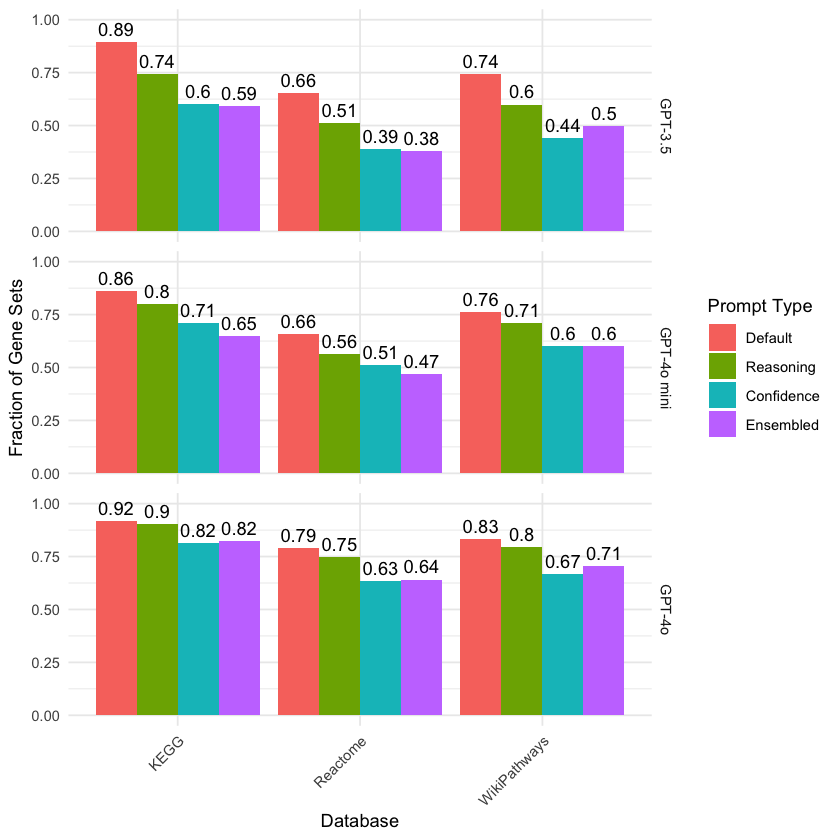

In [5]:
# Step 1: Group by 'database', 'model', and 'gene_set', and calculate the fraction of rows where p_val_adj < 0.01
df_fraction <- df %>%
  group_by(database, model, gene_set) %>%
  summarize(fraction_p_val_adj_lt_001 = mean(p_val_adj < 0.01, na.rm = TRUE)) %>%
  ungroup()

# Step 2: Create a bar plot grouped by 'database' and filled by 'gene_set', faceted by 'model' across rows
p <- ggplot(df_fraction, aes(x = database, y = fraction_p_val_adj_lt_001, fill = gene_set)) +
  geom_bar(stat = "identity", position = "dodge") +  # Create a grouped bar plot
  geom_text(aes(label = round(fraction_p_val_adj_lt_001, 2)),   # Add the fraction values rounded to 2 decimal places
            position = position_dodge(width = 0.9), vjust = -0.5) +  # Adjust the label position
  facet_grid(model ~ .) +  # Facet the plot by 'model' across rows
  scale_y_continuous(limits = c(0, 1)) +  # Set the y-axis to range from 0 to 1
  labs(x = "Database", y = "Fraction of Gene Sets", fill = "Prompt Type") +  # Update axis and legend labels
  theme_minimal() +  # Use a minimal theme
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) 
p

In [6]:
ggsave(p, file="figures/fig2B.pdf")

Saving 7 x 7 in image
